## Multiple Linear Regression Model for Bike Analysis by Vimala

### Problem Statement 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
Prepare a model for the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations


### Approach Followed
1. Data Analysis
2. Data cleaning 
    a. reducing redundant colums
3. Data Visualization using uni-variate and bi-variate, multi-variate analysis and understanding the correlation - multicollinearity 
4. Data Preparation
    a. converting the variables - to categorical variables
    b. creating dummy variables for all the categorical variables
5. Data Modelling using multiple linear regression model using all variables
    a. Create train and test data 
6. Creating various models based on P-value and VIF for train data
7. Based on Final model, do a residual analysis on the train data 
8. Make predictions using the final model
9. create test data set and Evaluate the model on test data set 
10. Calculate the r2


In [1]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Modelling

import sklearn 


### 1. Data Analysis - Understanding the data

In [2]:
bike_df=pd.read_csv(r"C:\Users\s_vim\Downloads\AIML\Linear Regression_22May2024\MLR\day.csv")
(bike_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Initial Observations
1. There are 16 columns with non-null values
2. Instant column is a duplicate of index - so can be dropped off.
3. dteday columns - is an object - The month and year are already available as independent columns. Needs to validate if extracting date is useful for further analysis or to drop the variable
4. weathersit & season - needs to be converted to categorical values
5. As mentioned in the case study, the target variable is cnt
6. registered, casual are reduntant and can be dropped off. 

In [6]:
print("Total number of rows is :" , bike_df.shape[0])
print("Total number of columns is :" , bike_df.shape[1])

Total number of rows is : 730
Total number of columns is : 16


### Step 2  Data Cleaning 
- removing redundant variables

#### Based on the observation the following columns ['instant','dteday','casual','registered'] seems to be redundant and can be dropped 

In [7]:
bike_df.drop(['instant','dteday','casual','registered'], inplace = True , axis=1)

In [8]:
bike_df.shape

(730, 12)

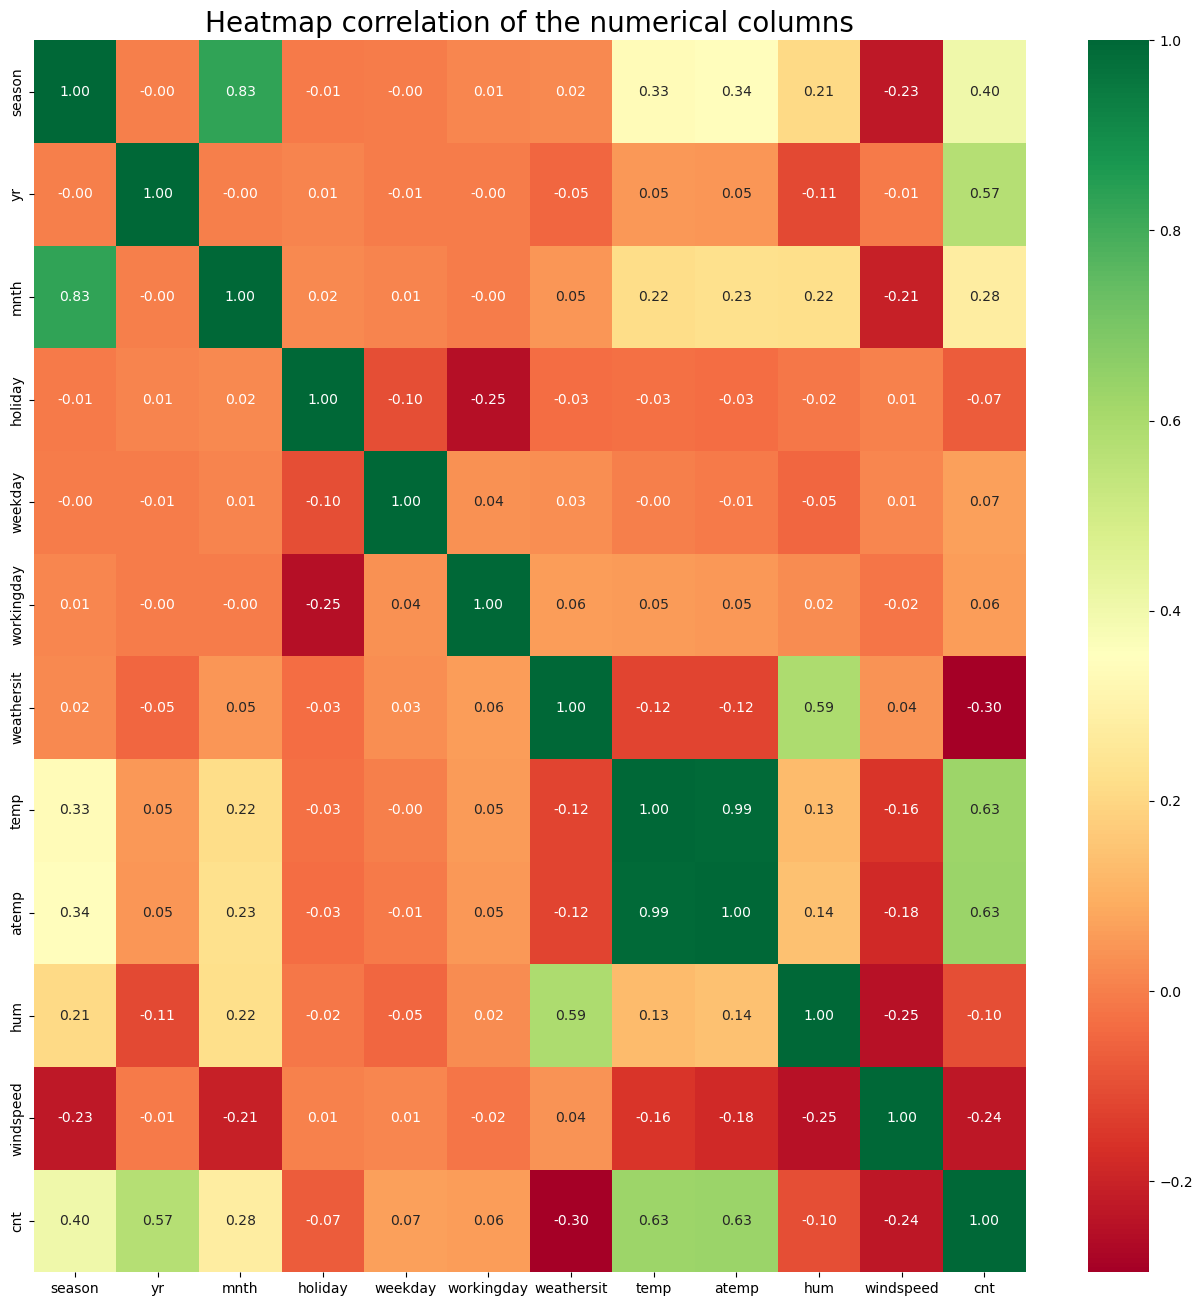

In [9]:
bike1_df = bike_df
plt.figure(figsize=(16,16))
plt.title("Heatmap correlation of the numerical columns", fontsize=20)
sns.heatmap(bike_df.corr(),annot=True,fmt='.2f',cmap="RdYlGn")
plt.show()

In [10]:
# Since temp and atemp has a very high correlation seems redundant and we will drop
bike_df.drop(['atemp'], inplace = True , axis=1)


### Step 3. Data Preparation
    a. converting the variables - to categorical variables
    b. creating dummy variables for all the categorical variables

In [11]:
print(bike_df.season.unique())
print(bike_df.weekday.unique())
print(bike_df.workingday.unique())
print(bike_df.weekday.unique())

[1 2 3 4]
[6 0 1 2 3 4 5]
[0 1]
[6 0 1 2 3 4 5]


### As per the insturctions 
1. converting the categorical variables to category
2. Then replacing with actual values for each of the categorical variables


In [12]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

bike_df[cat_cols]= bike_df[cat_cols].astype('category')

# num_cols=[temp', 'atemp', 'hum', 'windspeed','cnt']

bike_df['season'] = bike_df['season'].replace([1,2,3,4] ,['spring', 'summer', 'fall', 'winter'])
bike_df['weathersit'] = bike_df['weathersit'].replace([1,2,3,4] ,['Clear_PartlyCloudy', 'Mist_Cloudy', 'LightSnow_Rain', 'HeavyRain_Thunder'])
bike_df['yr']= bike_df['yr'].replace([0,1] ,['2018', '2019'])
bike_df['mnth'] = bike_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12] ,['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec'])
bike_df['weekday'] = bike_df['weekday'].replace([0,1,2,3,4,5,6] ,['tue', 'wed', 'thurs', 'fri','sat','sun','mon'])
bike_df['holiday']= bike_df['holiday'].replace([0,1] ,['not_holiday', 'yes_holiday'])
bike_df['workingday']= bike_df['workingday'].replace([0,1] ,['not_workingday', 'yes_workingday'])

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,not_holiday,mon,not_workingday,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,jan,not_holiday,tue,not_workingday,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,jan,not_holiday,wed,yes_workingday,Clear_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,not_holiday,thurs,yes_workingday,Clear_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,not_holiday,fri,yes_workingday,Clear_PartlyCloudy,9.305237,43.6957,12.522300,1600


In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


### Step 4. Data Visualisation


In [15]:
cat_cols = ['season', 'weathersit','holiday', 'weekday','workingday','yr', 'mnth']
num_cols=['temp', 'hum', 'windspeed','cnt']

Boxplot of  season


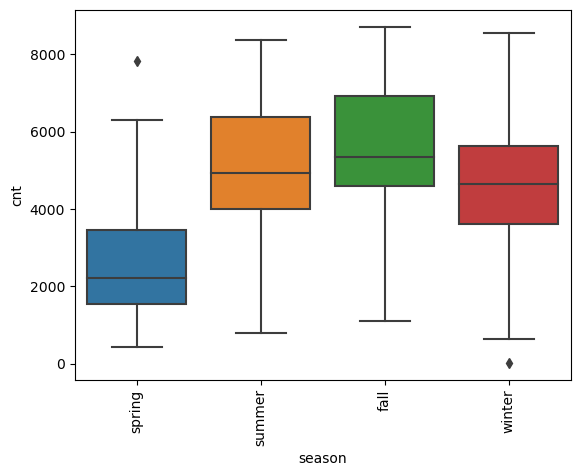

Boxplot of  weathersit


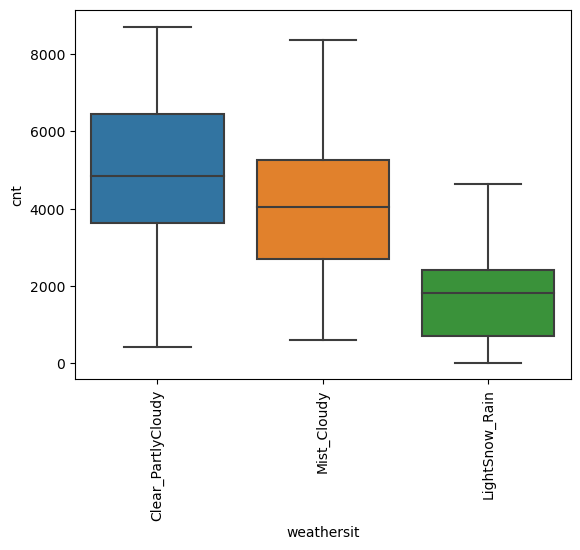

Boxplot of  holiday


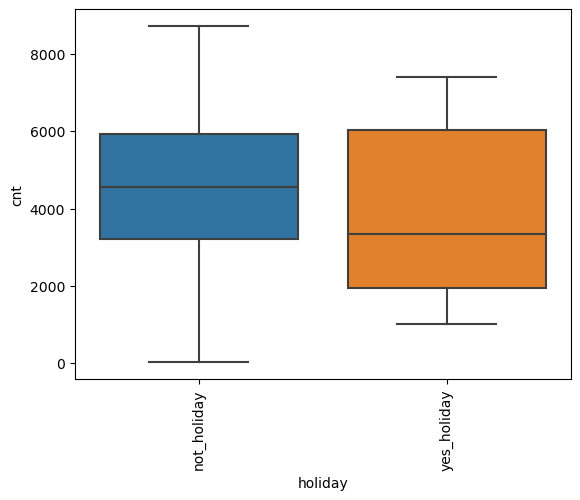

Boxplot of  weekday


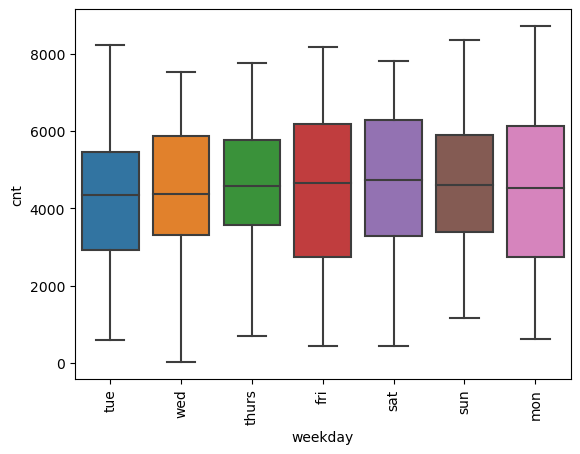

Boxplot of  workingday


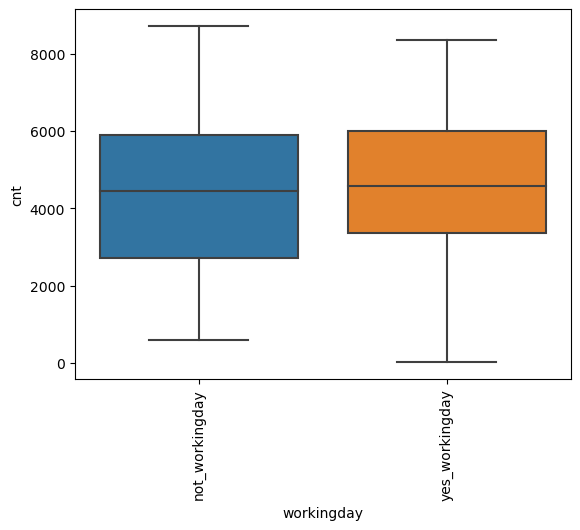

Boxplot of  yr


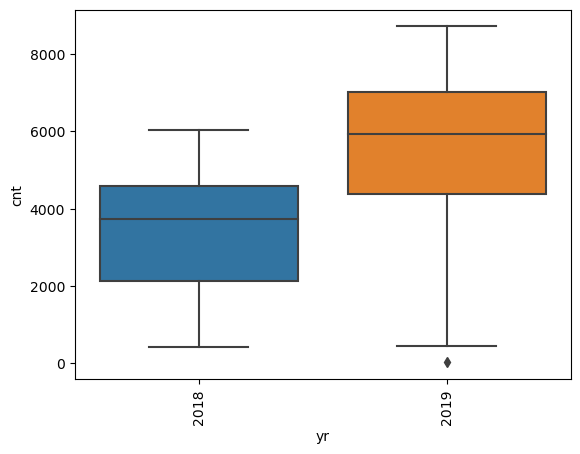

Boxplot of  mnth


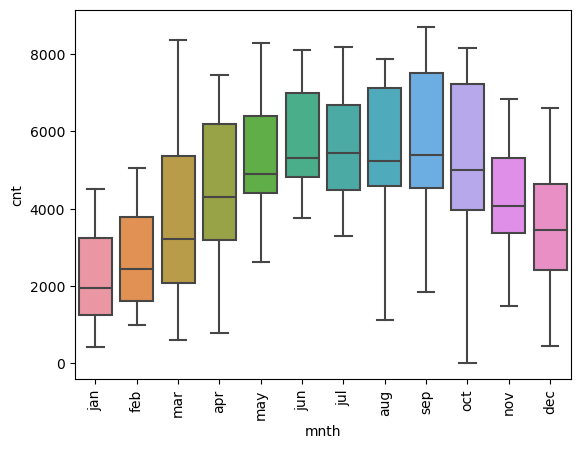

In [16]:
# Univariate Analysis using box plot
for i in cat_cols:
    sns.boxplot(x=bike_df[i] , y=bike_df['cnt'] )
    print("Boxplot of ", i)
    df = py.data.tips()
    plt.xticks(rotation=90)
    plt.show()

Barplot of  season


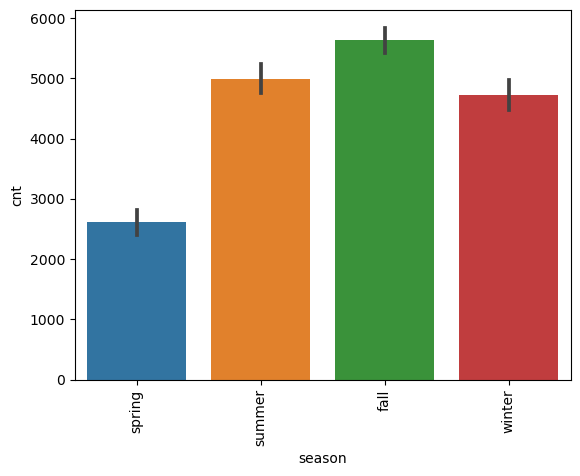

Barplot of  weathersit


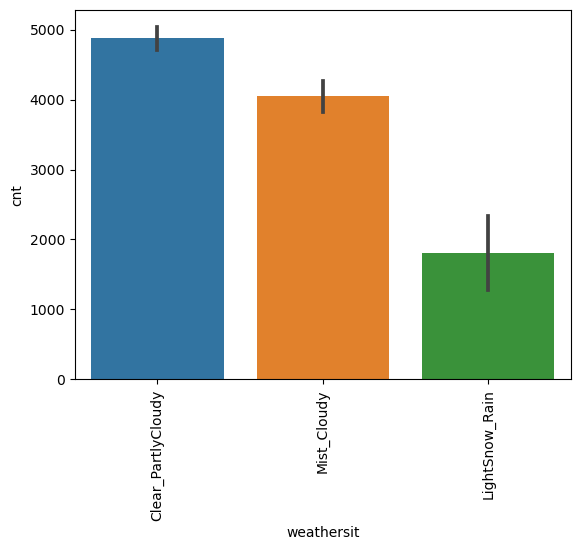

Barplot of  holiday


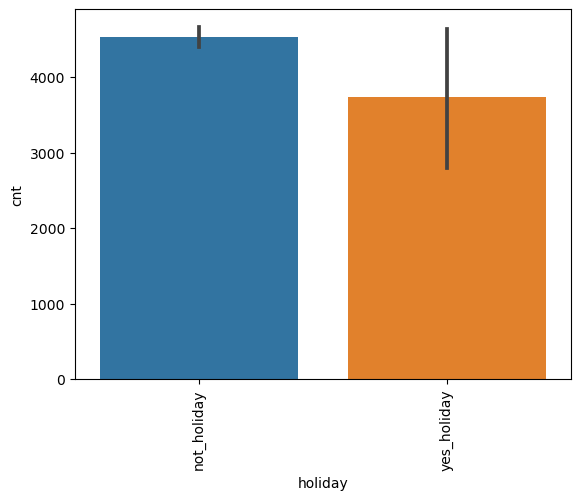

Barplot of  weekday


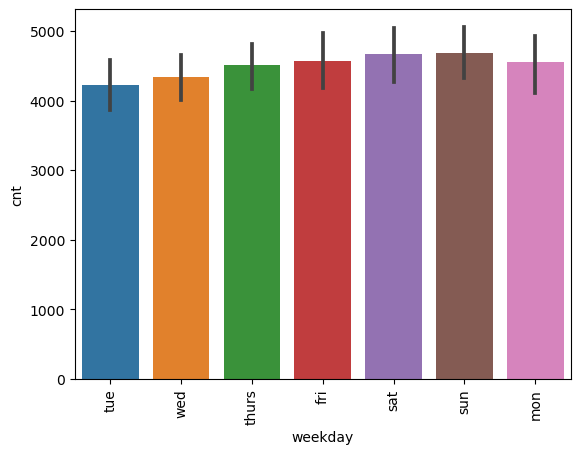

Barplot of  workingday


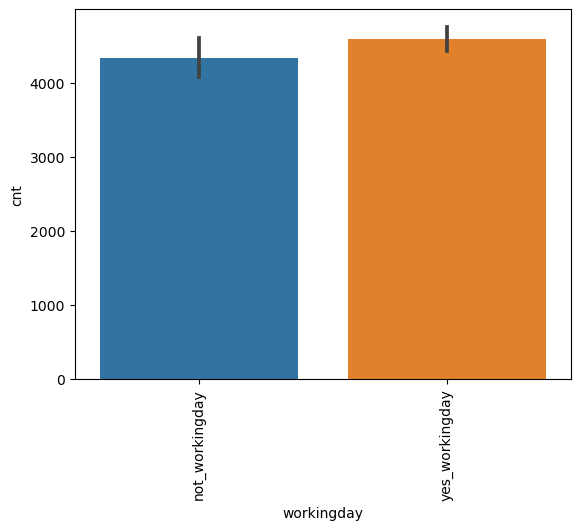

Barplot of  yr


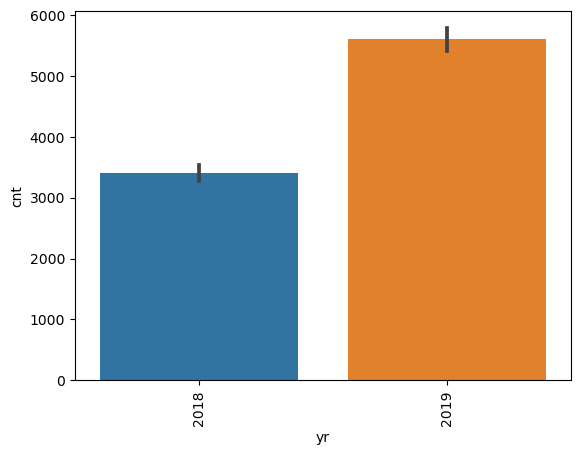

Barplot of  mnth


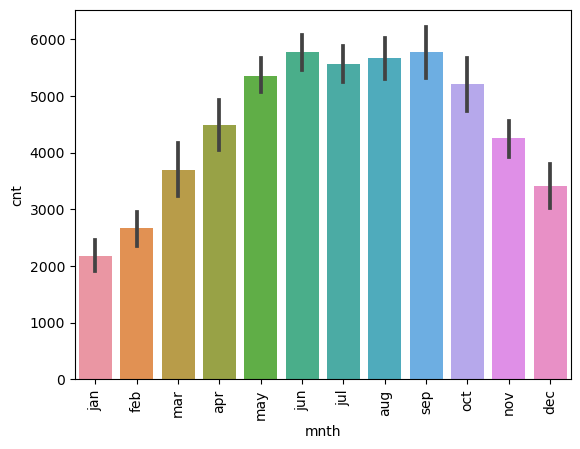

In [17]:
# Univariate Analysis using bar plot
for i in cat_cols:
    sns.barplot(x=bike_df[i] , y=bike_df['cnt'])
    print("Barplot of ", i)
    df = py.data.tips()
    plt.xticks(rotation=90)
    plt.show()

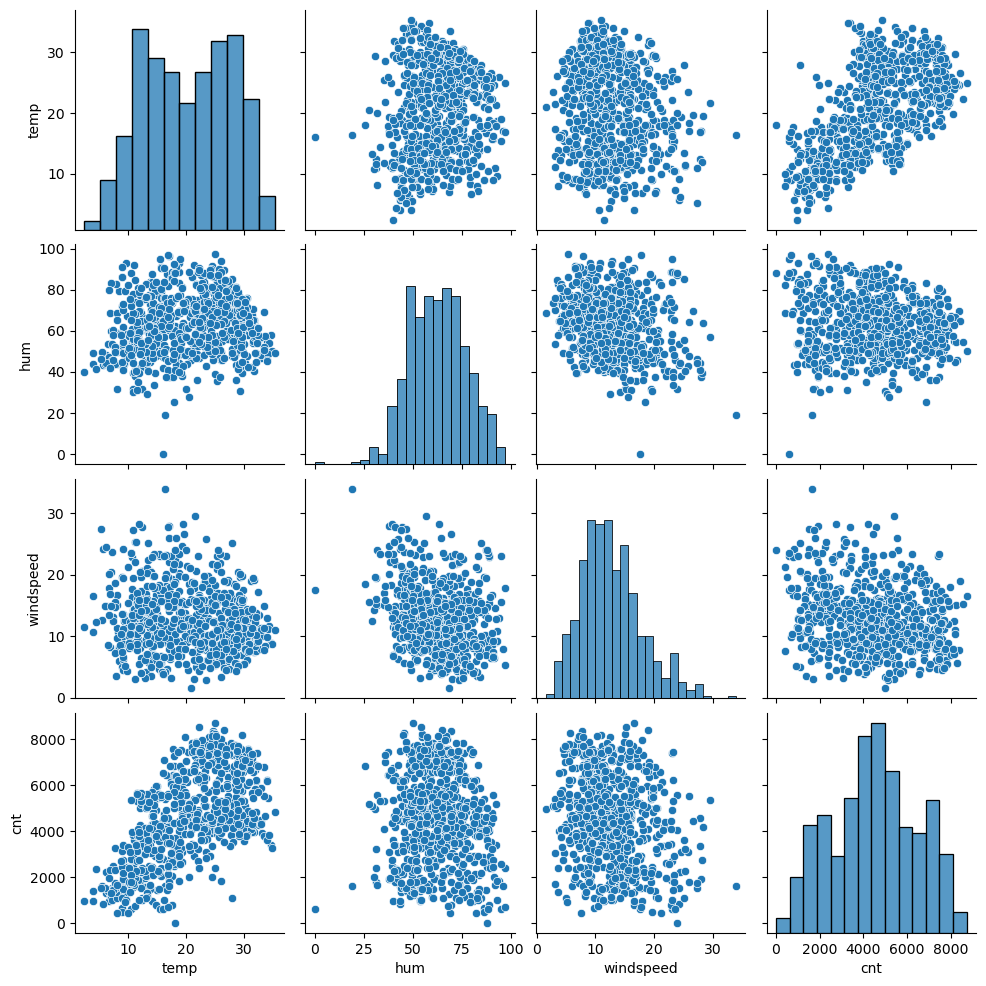

In [18]:
sns.pairplot(bike_df)
plt.show()

### Observation of categorical variables
season - 
1. There seems to be a outlier in spring
2. No of bikes used in fall is high followed by summer and winter. Surprisingly spring is less than winter

weathersit
3. As expected the usage of bike is when weather is clear followed by misty_cloudy. There is no bike usage during heavyrain_thunder

holiday 
4. the usage of bikes is low on a holiday, so on working days the average is more

weekday
5. The usage of bikes is most of the weekdays is same, low on tue

workingday
6. Whether it is a working day or not, the bike usage is more or less same

yr 
7. The bike usage increases from 2018 to 2019 almost doubled up

mnth
8. the usage of bikes is high in Jun,jul,aug,sep

9. As temp and humidity increases the usage of bike is also increasing, and when windspeed is low 

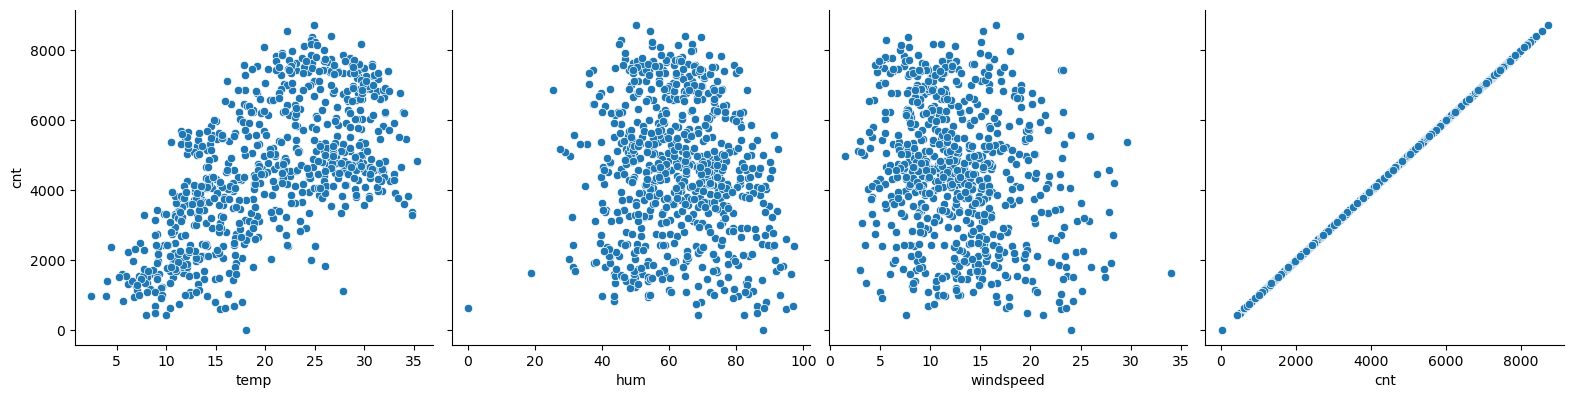

In [19]:
sns.pairplot(bike_df, x_vars=num_cols, y_vars='cnt', size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

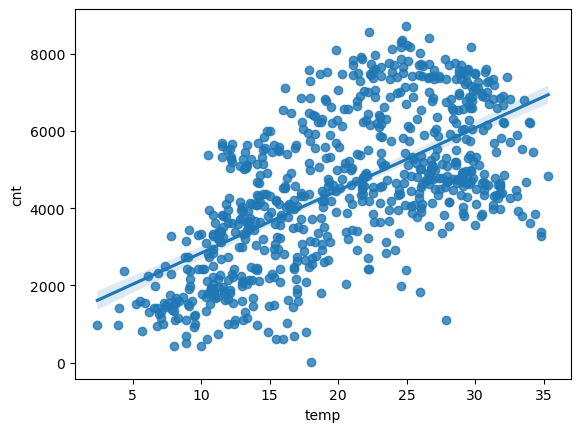

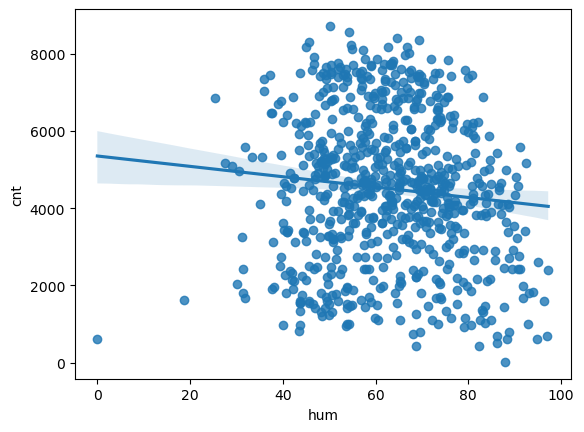

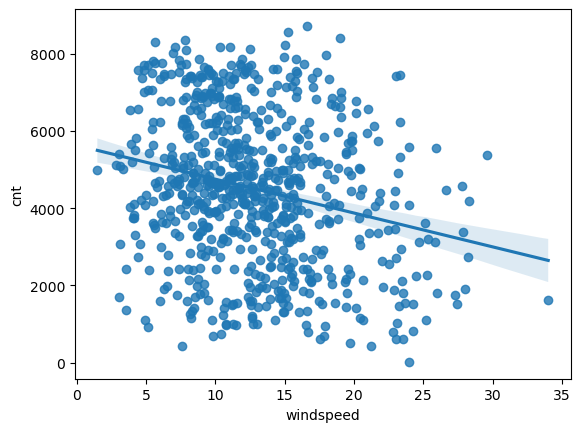

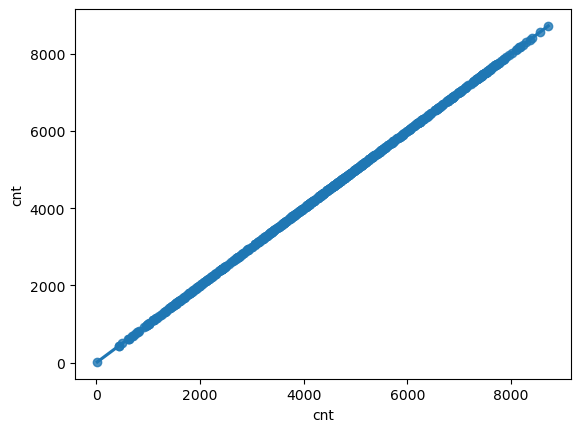

In [20]:
for i in num_cols:
    sns.regplot(data=bike_df,y= bike_df['cnt'],x=i)
    plt.xlabel(i)
    plt.show()

bar plot of : season Vs temp


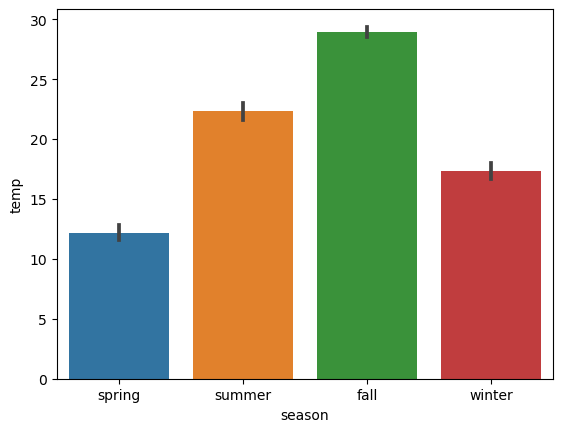

bar plot of : season Vs hum


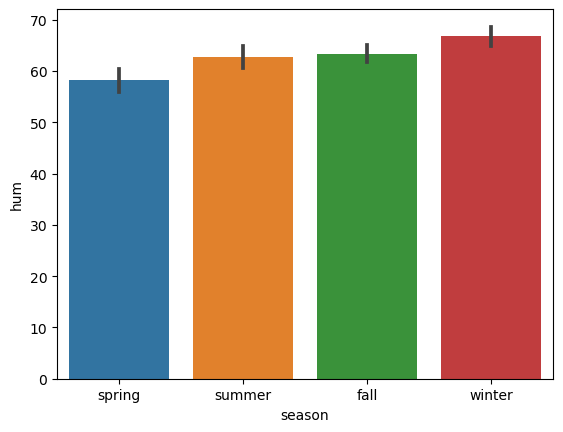

bar plot of : season Vs windspeed


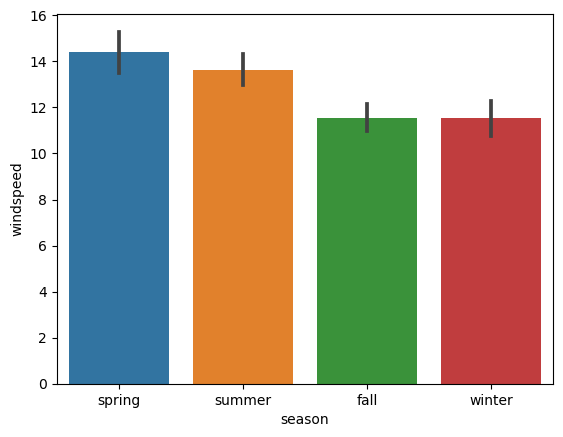

bar plot of : season Vs cnt


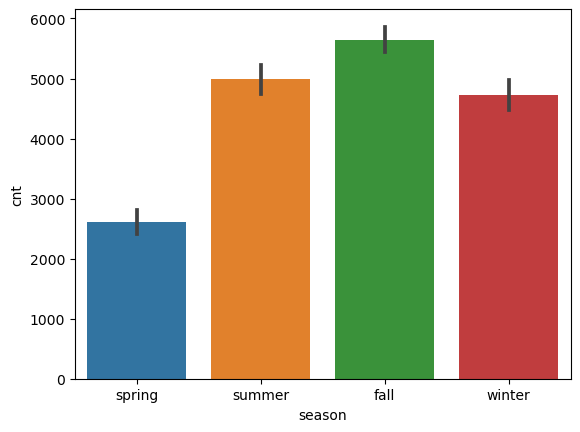

bar plot of : weathersit Vs temp


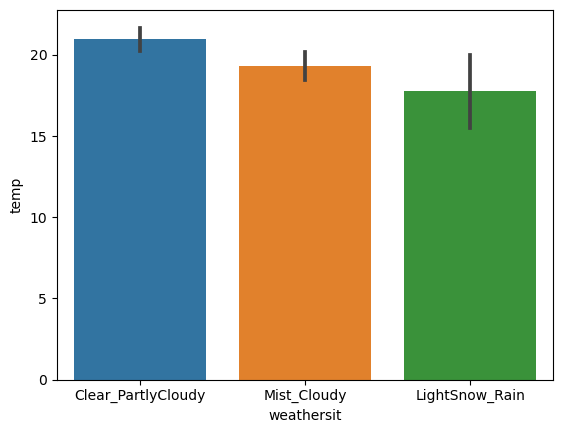

bar plot of : weathersit Vs hum


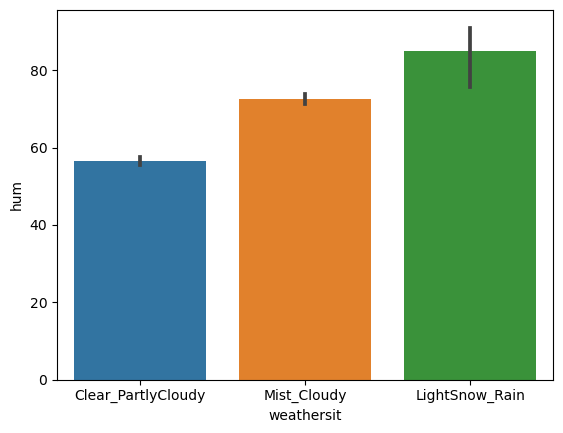

bar plot of : weathersit Vs windspeed


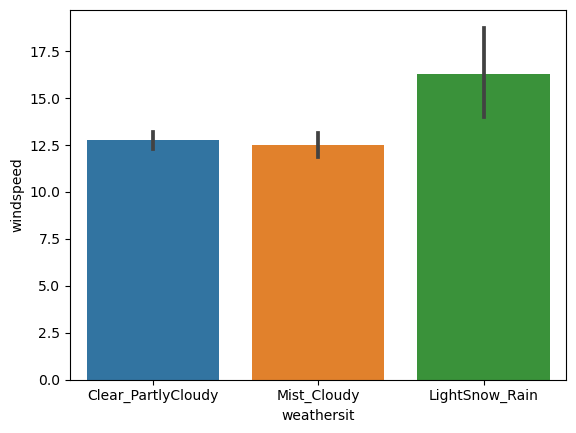

bar plot of : weathersit Vs cnt


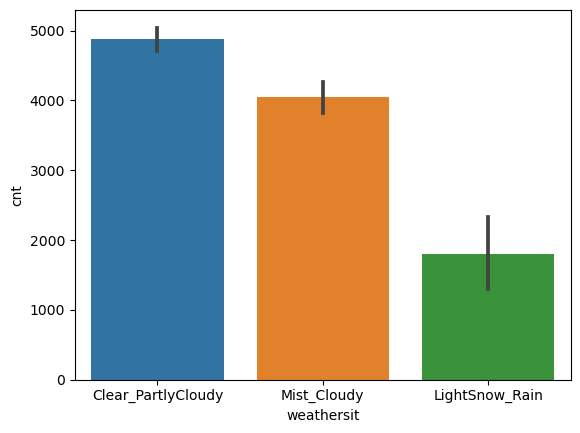

bar plot of : holiday Vs temp


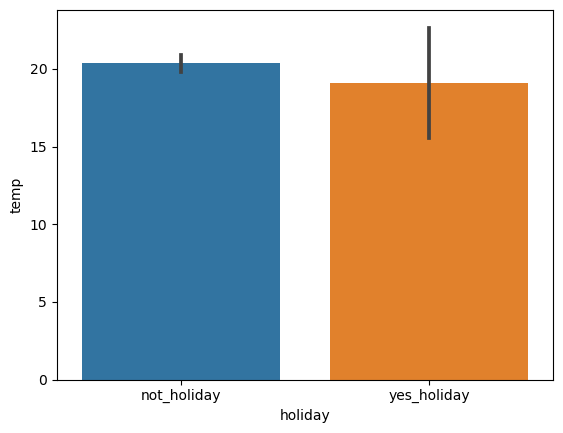

bar plot of : holiday Vs hum


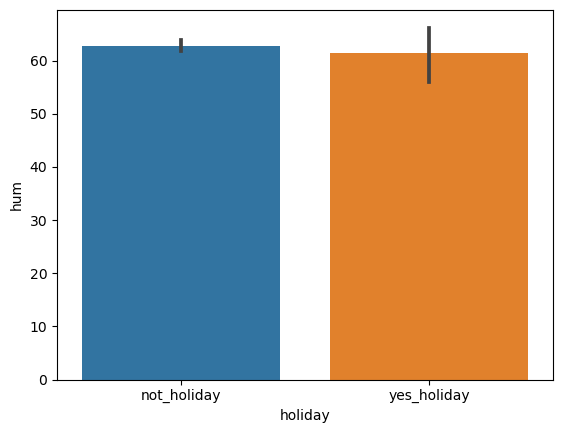

bar plot of : holiday Vs windspeed


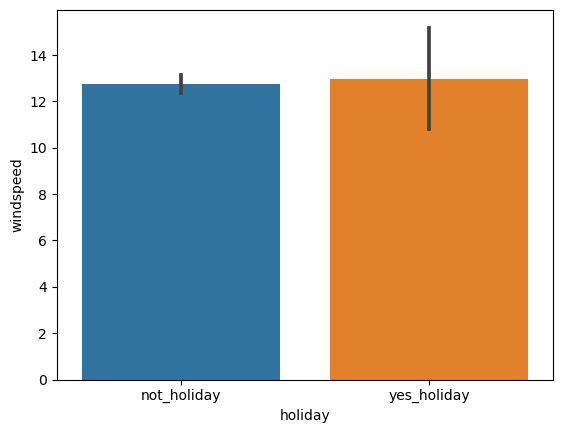

bar plot of : holiday Vs cnt


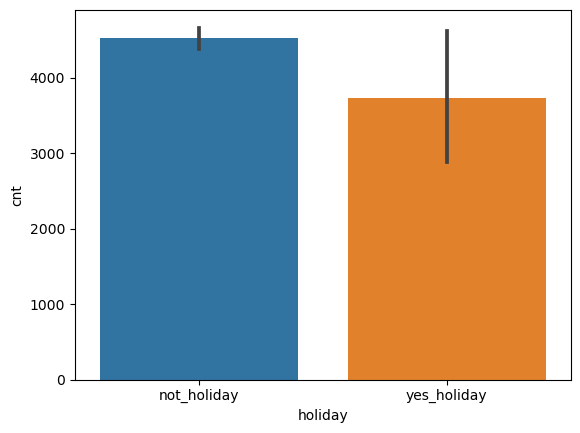

bar plot of : weekday Vs temp


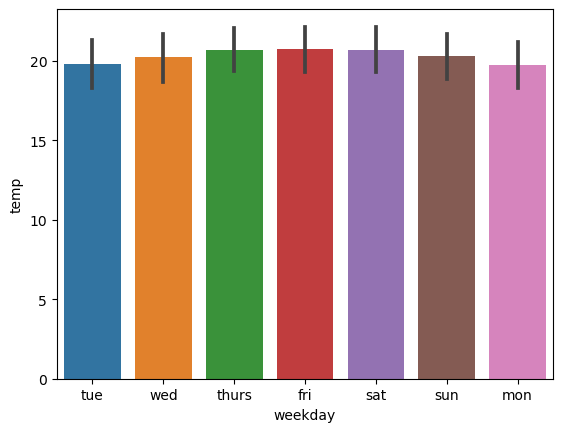

bar plot of : weekday Vs hum


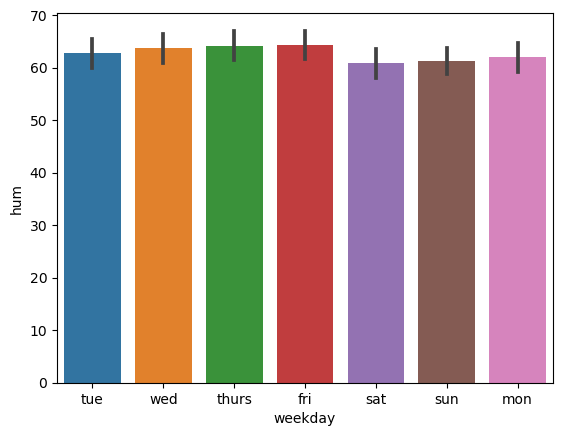

bar plot of : weekday Vs windspeed


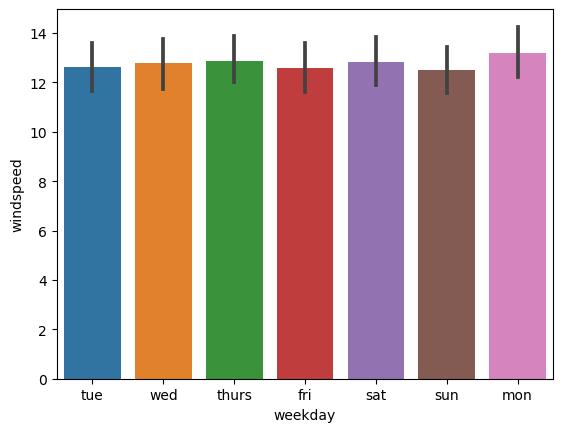

bar plot of : weekday Vs cnt


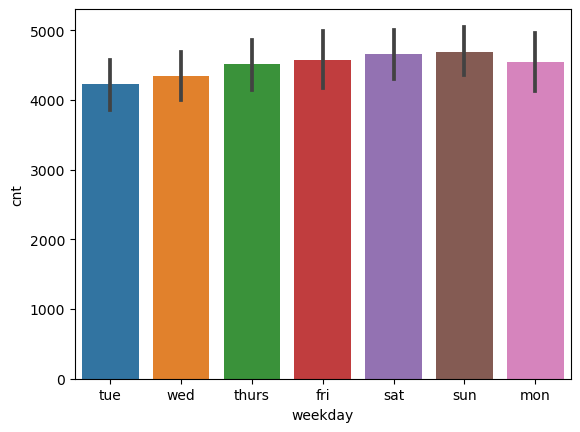

bar plot of : workingday Vs temp


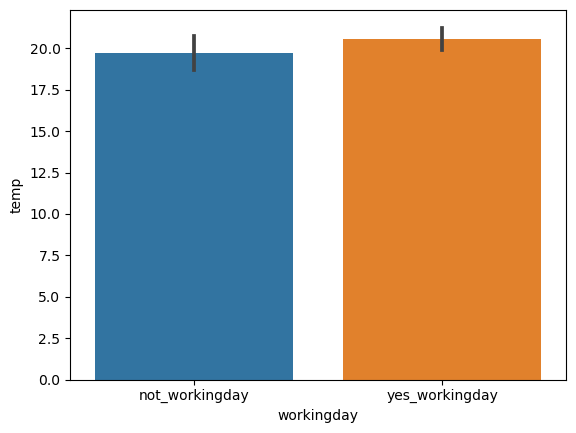

bar plot of : workingday Vs hum


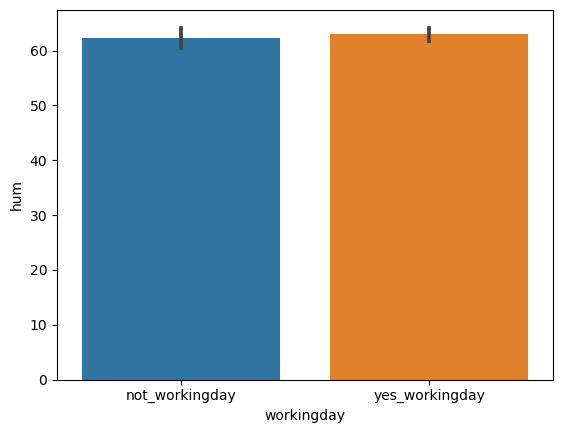

bar plot of : workingday Vs windspeed


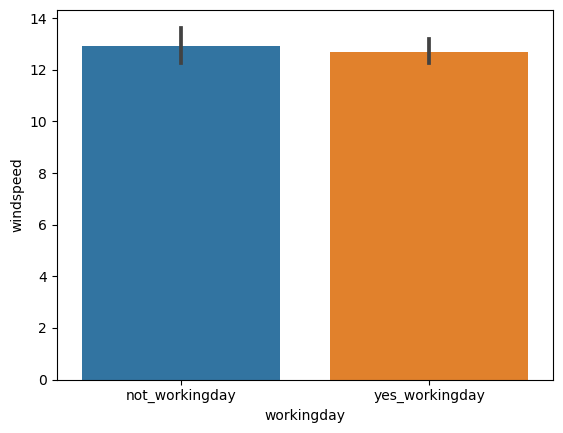

bar plot of : workingday Vs cnt


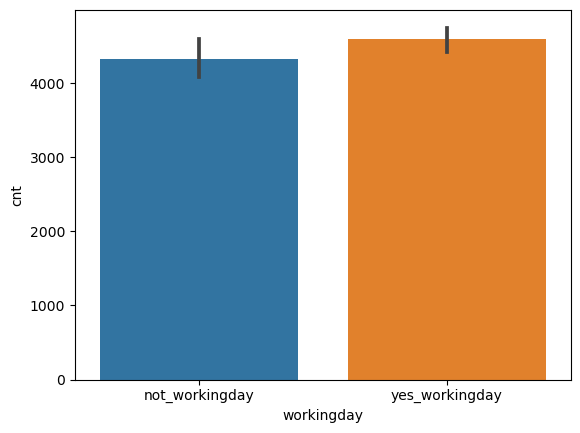

bar plot of : yr Vs temp


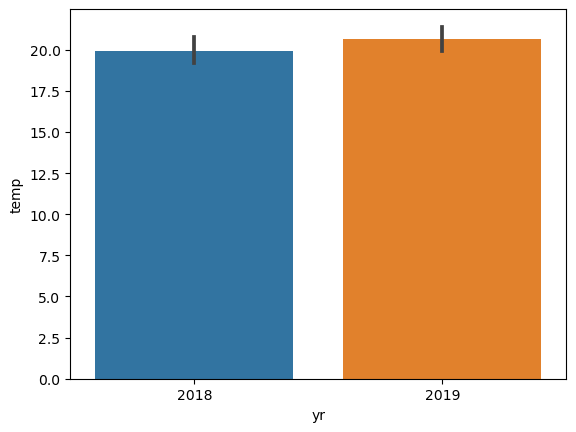

bar plot of : yr Vs hum


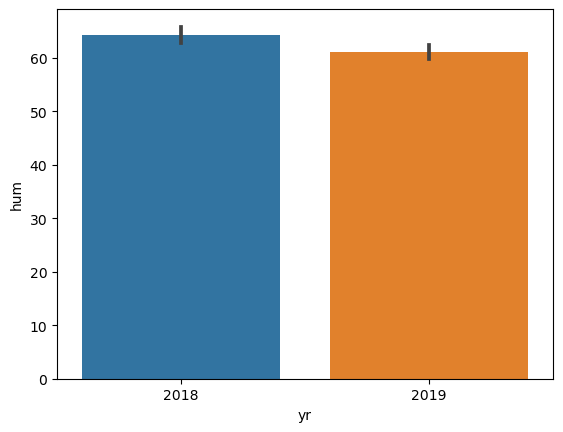

bar plot of : yr Vs windspeed


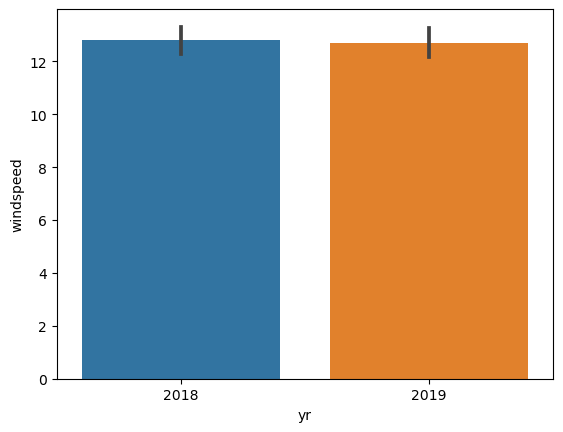

bar plot of : yr Vs cnt


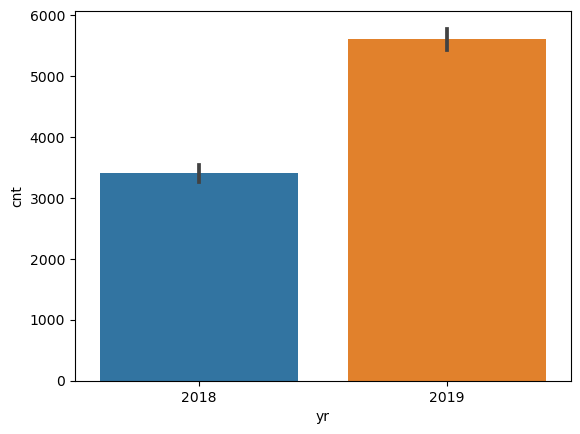

bar plot of : mnth Vs temp


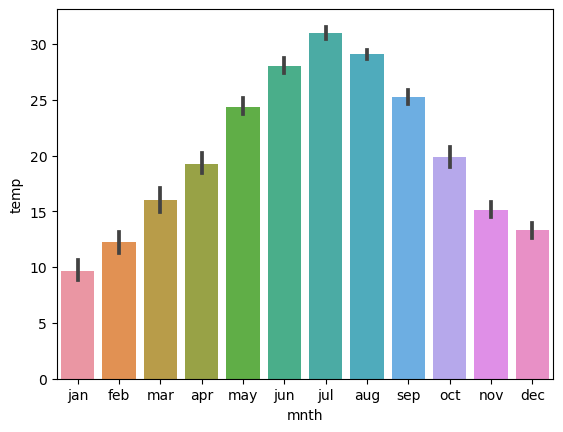

bar plot of : mnth Vs hum


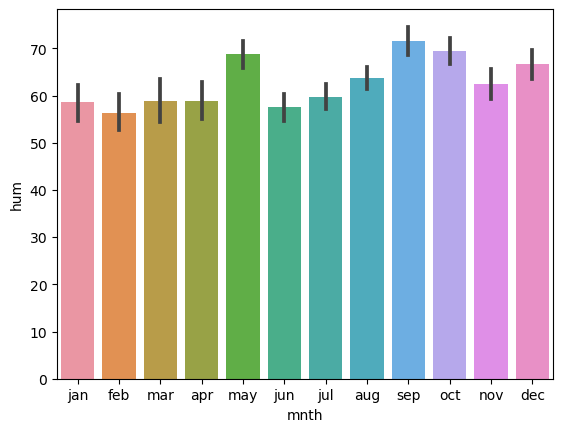

bar plot of : mnth Vs windspeed


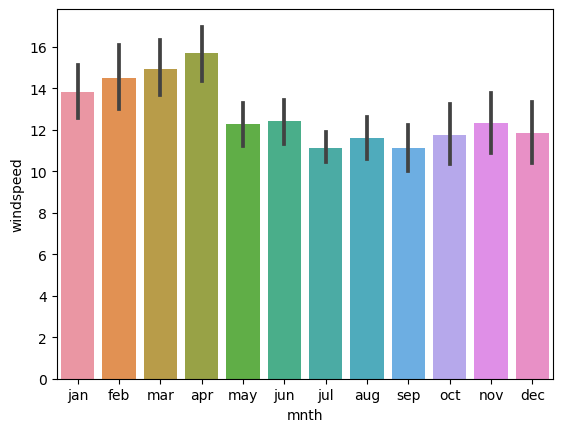

bar plot of : mnth Vs cnt


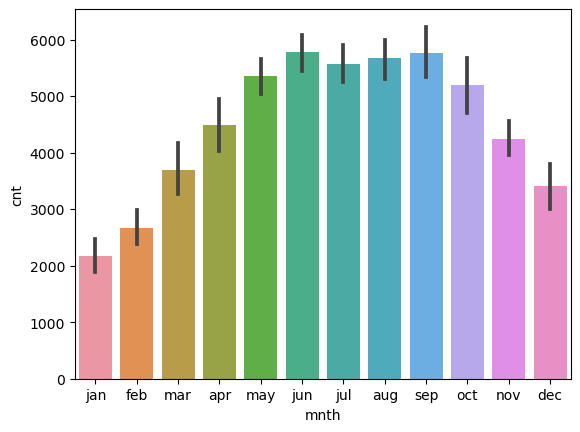

In [21]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("bar plot of :", col1, "Vs", col2)
        sns.barplot(x=bike_df[col1], y=bike_df[col2])
        plt.show()

Bivariate onalysis of cat_cols and num_cols are not very useful in our case so ignoring it here

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


In [23]:
# Dropping cnt > 7000 for spring
bike_df.drop(bike_df[(bike_df.season == "spring") & (bike_df.cnt > 7000)].index,inplace=True)

In [24]:
bike_df.shape

(729, 11)

#### Creating Dummy Variables for all the categorical variables and dropping off the first column


In [25]:
cat_cols = ['season', 'weathersit','holiday', 'weekday','workingday','yr', 'mnth']

dummy = pd.get_dummies(bike_df[cat_cols], drop_first=True, dtype=int)
dummy.head()

,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_Rain,holiday_yes_holiday,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
bike_df1=pd.concat([bike_df, dummy], axis=1)
bike_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,spring,2018,jan,not_holiday,mon,not_workingday,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,2018,jan,not_holiday,tue,not_workingday,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,2018,jan,not_holiday,wed,yes_workingday,Clear_PartlyCloudy,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,2018,jan,not_holiday,thurs,yes_workingday,Clear_PartlyCloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,2018,jan,not_holiday,fri,yes_workingday,Clear_PartlyCloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Dropping off the category cals as the dummies are created 
bike_df1.drop(cat_cols, axis=1, inplace = True)
bike_df1.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_Rain,holiday_yes_holiday,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temp                       729 non-null    float64
 1   hum                        729 non-null    float64
 2   windspeed                  729 non-null    float64
 3   cnt                        729 non-null    int64  
 4   season_summer              729 non-null    int32  
 5   season_fall                729 non-null    int32  
 6   season_winter              729 non-null    int32  
 7   weathersit_Mist_Cloudy     729 non-null    int32  
 8   weathersit_LightSnow_Rain  729 non-null    int32  
 9   holiday_yes_holiday        729 non-null    int32  
 10  weekday_wed                729 non-null    int32  
 11  weekday_thurs              729 non-null    int32  
 12  weekday_fri                729 non-null    int32  
 13  weekday_sat                729 non-null    int32  
 14 

In [29]:
bike_df1.shape

(729, 29)

### Step 5.  Data Modelling using multiple linear regression model

The model will be initially build using all variables
Split the Data into Training and Testing Sets, scaling the data 

In [30]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df1_train, bike_df1_test = train_test_split(bike_df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
print(bike_df1_train.shape)
print(bike_df1_test.shape)

(510, 29)
(219, 29)


### Next step is scaling the data

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the num columns except the 'yes-no' and 'dummy' variables
num_cols=['temp', 'hum', 'windspeed','cnt']

bike_df1_train[num_cols] = scaler.fit_transform(bike_df1_train[num_cols])

In [35]:
bike_df1_train.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_Rain,holiday_yes_holiday,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
626,0.614763,0.553027,0.371638,0.864421,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
363,0.314673,0.656076,0.197852,0.310033,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
425,0.366591,0.677114,0.220569,0.333575,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,0.245101,0.498067,0.663106,0.164795,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,0.395666,0.504508,0.188475,0.457443,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
bike_df1_train.describe()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_Rain,holiday_yes_holiday,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.539048,0.648381,0.315400,0.493311,0.245098,0.264706,0.24902,0.343137,0.027451,0.021569,...,0.096078,0.074510,0.088235,0.076471,0.078431,0.092157,0.086275,0.082353,0.082353,0.094118
std,0.227284,0.145999,0.170073,0.237651,0.430568,0.441610,0.43287,0.475223,0.163554,0.145413,...,0.294988,0.262857,0.283915,0.266010,0.269113,0.289531,0.281045,0.275172,0.275172,0.292279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336738,0.538643,0.195527,0.326090,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545711,0.649205,0.285417,0.496076,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.739627,0.755904,0.406426,0.685832,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


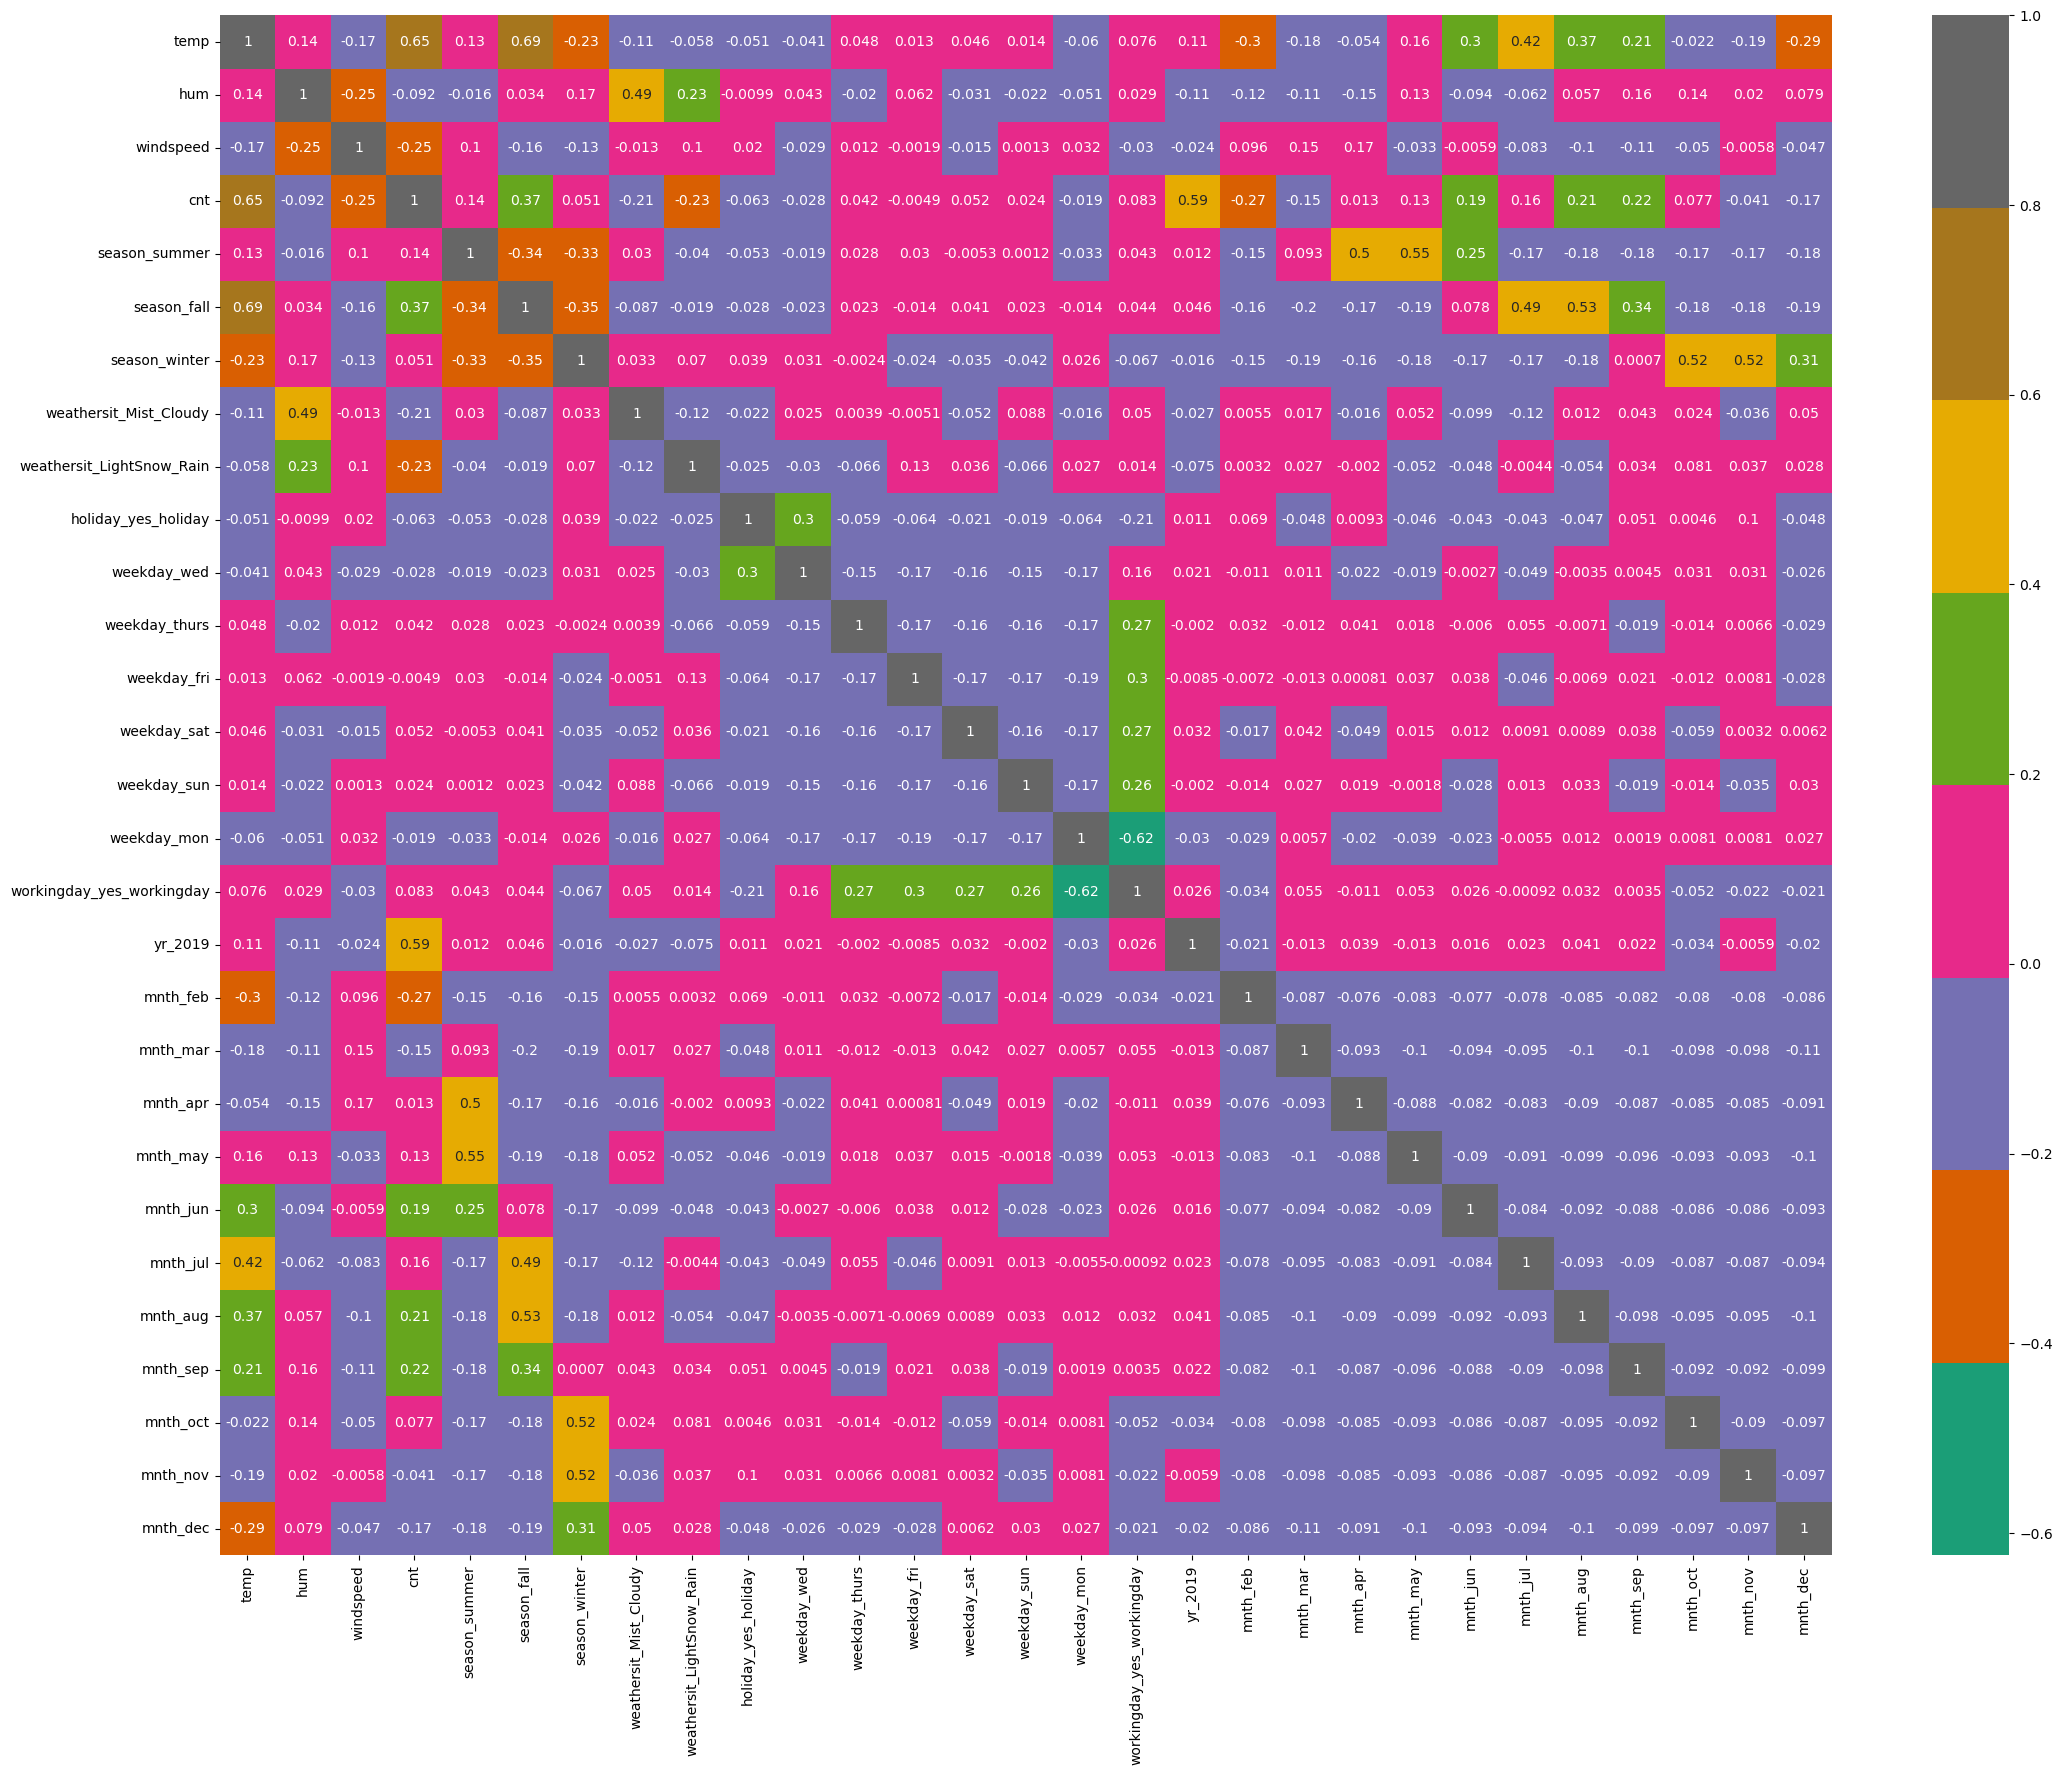

In [37]:
plt.figure(figsize = (26,20))
sns.heatmap(bike_df1_train.corr(), annot = True, cmap= 'Dark2')
plt.show()

In [38]:
bike_df1_train.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_summer', 'season_fall',
       'season_winter', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_Rain',
       'holiday_yes_holiday', 'weekday_wed', 'weekday_thurs', 'weekday_fri',
       'weekday_sat', 'weekday_sun', 'weekday_mon',
       'workingday_yes_workingday', 'yr_2019', 'mnth_feb', 'mnth_mar',
       'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep',
       'mnth_oct', 'mnth_nov', 'mnth_dec'],
      dtype='object')

### Step : Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

### Model 1 - base model

In [39]:
y_train = bike_df1_train.pop('cnt')
X_train = bike_df1_train

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 626 to 521
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temp                       510 non-null    float64
 1   hum                        510 non-null    float64
 2   windspeed                  510 non-null    float64
 3   season_summer              510 non-null    int32  
 4   season_fall                510 non-null    int32  
 5   season_winter              510 non-null    int32  
 6   weathersit_Mist_Cloudy     510 non-null    int32  
 7   weathersit_LightSnow_Rain  510 non-null    int32  
 8   holiday_yes_holiday        510 non-null    int32  
 9   weekday_wed                510 non-null    int32  
 10  weekday_thurs              510 non-null    int32  
 11  weekday_fri                510 non-null    int32  
 12  weekday_sat                510 non-null    int32  
 13  weekday_sun                510 non-null    int32  
 1

In [40]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 27 May 2024   Prob (F-statistic):          8.54e-189
Time:                        01:38:57   Log-Likelihood:                 516.36
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     482   BIC:                            -858.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1459      0.031      4.675      0.000       0.085       0.207
temp                          0.4637      0.047      9.888      0.000       0.372       0.556
hum                          -0.1825      0.040     -4.615      0.000      -0.260      -0.105
windspeed                    -0.1686      0.026     -6.465      0.000      -0.220      -0.117
season_summer                 0.1039      0.024      4.331      0.000       0.057       0.151
season_fall                   0.0705      0.029      2.398      0.017       0.013       0.128
season_winter                 0.1760      0.025      7.108      0.000       0.127       0.225
weathersit_Mist_Cloudy       -0.0665      0.011     -6.158      0.000      -0.088      -0.045
weathersit_LightSnow_Rain    -0.2397      0.028     -8.619      0.000      -0.294      -0.185
holiday_yes_holiday          -0.0290      0.026     -1.114      0.266      -0.080       0.022
weekday_wed                  -0.0084      0.011     -0.801      0.423      -0.029       0.012
weekday_thurs                -0.0015      0.011     -0.131      0.896      -0.024       0.021
weekday_fri                   0.0057      0.011      0.518      0.604      -0.016       0.027
weekday_sat                   0.0038      0.011      0.335      0.738      -0.018       0.026
weekday_sun                   0.0145      0.011      1.285      0.199      -0.008       0.037
weekday_mon                   0.0545      0.015      3.699      0.000       0.026       0.084
workingday_yes_workingday     0.0430      0.010      4.434      0.000       0.024       0.062
yr_2019                       0.2408      0.008     29.285      0.000       0.225       0.257
mnth_feb                      0.0238      0.021      1.112      0.267      -0.018       0.066
mnth_mar                      0.0576      0.023      2.471      0.014       0.012       0.103
mnth_apr                      0.0502      0.035      1.446      0.149      -0.018       0.118
mnth_may                      0.0893      0.037      2.406      0.016       0.016       0.162
mnth_jun                      0.0582      0.040      1.473      0.141      -0.019       0.136
mnth_jul                      0.0076      0.044      0.173      0.863      -0.079       0.094
mnth_aug                      0.0683      0.042      1.628      0.104      -0.014       0.151
mnth_sep                      0.1391      0.037      3.732      0.000       0.066       0.212
mnth_oct                      0.0680      0.034      1.996      0.046       0.001       0.135
mnth_nov                      0.0025      0.032      0.077      0.938      -0.061       0.066
mnth_dec                      0.0071      0.026      0.275      0.784      -0.043       0.058
===========================================================================

In [41]:
X_train.describe()

,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_Rain,holiday_yes_holiday,weekday_wed,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.539048,0.648381,0.315400,0.245098,0.264706,0.24902,0.343137,0.027451,0.021569,0.131373,...,0.096078,0.074510,0.088235,0.076471,0.078431,0.092157,0.086275,0.082353,0.082353,0.094118
std,0.227284,0.145999,0.170073,0.430568,0.441610,0.43287,0.475223,0.163554,0.145413,0.338139,...,0.294988,0.262857,0.283915,0.266010,0.269113,0.289531,0.281045,0.275172,0.275172,0.292279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336738,0.538643,0.195527,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545711,0.649205,0.285417,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.739627,0.755904,0.406426,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Let us calculate the VIF values and compare with p-value

Let us calculate the VIF to see which variables 
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 
It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weekday_sun,inf
9,holiday_yes_holiday,inf
16,workingday_yes_workingday,inf
13,weekday_sat,inf
12,weekday_fri,inf
11,weekday_thurs,inf
10,weekday_wed,inf
0,const,60.70
5,season_fall,10.51
24,mnth_aug,9.20


The thumb rule says for P-value and VIF
1. High P-value and High VIF - Delete the feature or variable
2. High P-Value and Low VIF - Delete this first
3. Low P-value and High VIF - Rerun and then validate and delete
4. Low P-value and Low VIF - ignore 
and in general any VIF < 5 is good
VIF >10 is high and can be dropped

### Step 6. Creating various models based on P-value and VIF for train data


### Model 2
since this field mnth_nov has a vary high p-value .938 and also VIF as inf - let us drop and rebuild the model again 

In [44]:
X = X_train.drop('mnth_nov', axis=1)

In [45]:
# Build a second fitted model 2
X_train_lm = sm.add_constant(X)
lr_2= sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 27 May 2024   Prob (F-statistic):          7.84e-190
Time:                        01:38:57   Log-Likelihood:                 516.35
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     483   BIC:                            -864.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
# Comparing P Value and VIF for Model 2 
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weekday_sun,inf
9,holiday_yes_holiday,inf
16,workingday_yes_workingday,inf
13,weekday_sat,inf
12,weekday_fri,inf
11,weekday_thurs,inf
10,weekday_wed,inf
0,const,60.24
5,season_fall,9.10
1,temp,6.81


### Model 3
since this field 'weekday_thurs','weekday_fri','weekday_sat' has a vary high p-value > 0.5 and also VIF as inf as per the rule - let us drop and rebuild the model again

In [47]:
X = X.drop(['weekday_thurs','weekday_fri','weekday_sat'], axis=1)

In [48]:
# Build a third fitted model 3
X_train_lm = sm.add_constant(X)
lr_3= sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 27 May 2024   Prob (F-statistic):          6.95e-192
Time:                        01:38:58   Log-Likelihood:                 516.23
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     485   BIC:                            -876.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
# Comparing P Value and VIF for Model 3
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.15
5,season_fall,9.09
1,temp,6.81
21,mnth_aug,6.65
20,mnth_jul,6.46
4,season_summer,6.32
18,mnth_may,5.72
19,mnth_jun,5.34
17,mnth_apr,4.30
22,mnth_sep,4.19


### Model 4
since this field 'mnth_jul', 'mnth_dec' has a vary high p-value > .5 as per the rule - let us drop and rebuild the model again

In [50]:
X = X.drop(['mnth_jul','mnth_dec'], axis=1)

# Build a fourth fitted model 4
X_train_lm = sm.add_constant(X)
lr_4= sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 27 May 2024   Prob (F-statistic):          5.28e-194
Time:                        01:38:58   Log-Likelihood:                 516.17
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     487   BIC:                            -888.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [51]:
# Comparing P Value and VIF for Model 3
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.40
5,season_fall,6.99
4,season_summer,5.73
1,temp,4.40
18,mnth_may,3.59
17,mnth_apr,3.10
6,season_winter,3.01
19,mnth_jun,2.28
13,workingday_yes_workingday,2.06
2,hum,2.01


### Model 5
since this fields 'weekday_wed', 'weekday_sun' has a very high p-value >.05 as per the rule - let us drop and rebuild the model again

In [52]:
X = X.drop(['weekday_wed', 'weekday_sun'], axis=1)
# Build a fifth fitted model 5
X_train_lm = sm.add_constant(X)
lr_5= sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 27 May 2024   Prob (F-statistic):          1.00e-195
Time:                        01:38:58   Log-Likelihood:                 515.04
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     489   BIC:                            -899.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [53]:
# Comparing P Value and VIF for Model 5
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.29
5,season_fall,6.98
4,season_summer,5.73
1,temp,4.37
16,mnth_may,3.59
15,mnth_apr,3.10
6,season_winter,3.01
17,mnth_jun,2.27
2,hum,2.00
11,workingday_yes_workingday,1.87


### Model 6
since this field mnth_feb has a vary high p-value of >0.05 as per the rule - let us drop and rebuild the model again

In [54]:
X = X.drop('mnth_feb', axis=1)
# Build a sixth fitted model 6
X_train_lm = sm.add_constant(X)
lr_6= sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 27 May 2024   Prob (F-statistic):          1.39e-196
Time:                        01:38:58   Log-Likelihood:                 514.44
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     490   BIC:                            -904.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [55]:
# Comparing P Value and VIF for Model 6
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.97
5,season_fall,6.41
4,season_summer,5.63
1,temp,4.36
15,mnth_may,3.50
14,mnth_apr,3.01
6,season_winter,2.47
16,mnth_jun,2.23
2,hum,1.99
11,workingday_yes_workingday,1.87


### Model 7
since this field holiday_yes_holiday has a vary high p-value of >.05 as per the rule - let us drop and rebuild the model again

In [56]:
X = X.drop('holiday_yes_holiday', axis=1)
# Build a Seventh fitted model 7
X_train_lm = sm.add_constant(X)
lr_7= sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     169.6
Date:                Mon, 27 May 2024   Prob (F-statistic):          2.13e-197
Time:                        01:38:58   Log-Likelihood:                 513.70
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     491   BIC:                            -908.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [57]:
# Comparing P Value and VIF for Model 7
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.99
5,season_fall,6.40
4,season_summer,5.63
1,temp,4.36
14,mnth_may,3.49
13,mnth_apr,3.01
6,season_winter,2.47
15,mnth_jun,2.23
2,hum,1.99
16,mnth_aug,1.76


### Model 8
since this field mnth_apr has a vary high p-value > .05 as per the rule - let us drop and rebuild the model again

In [58]:
X = X.drop('mnth_apr', axis=1)
# Build a Eighth fitted model 8
X_train_lm = sm.add_constant(X)
lr_8= sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 27 May 2024   Prob (F-statistic):          5.36e-198
Time:                        01:38:58   Log-Likelihood:                 512.41
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     492   BIC:                            -912.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [59]:
# Comparing P Value and VIF for Model 7
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.48
5,season_fall,6.40
1,temp,4.34
4,season_summer,2.88
6,season_winter,2.44
2,hum,1.96
13,mnth_may,1.90
15,mnth_aug,1.72
10,workingday_yes_workingday,1.68
9,weekday_mon,1.66


### Model 9
since this field season_fall has a vary high VIF > 5 as per the rule - let us drop and rebuild the model again

In [60]:
X = X.drop('season_fall', axis=1)
# Build a Nineth fitted model 9
X_train_lm = sm.add_constant(X)
lr_9= sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     186.9
Date:                Mon, 27 May 2024   Prob (F-statistic):          2.02e-197
Time:                        01:38:59   Log-Likelihood:                 508.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     493   BIC:                            -910.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [61]:
# Comparing P Value and VIF for Model 9
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.43
2,hum,1.94
1,temp,1.91
4,season_summer,1.89
12,mnth_may,1.80
5,season_winter,1.77
9,workingday_yes_workingday,1.68
8,weekday_mon,1.66
6,weathersit_Mist_Cloudy,1.60
14,mnth_aug,1.58


### Model 10
since this field 'mnth_jun', 'mnth_mar' has a vary high p-value of .200 as per the rule - let us drop and rebuild the model again

In [62]:
X = X.drop(['mnth_jun', 'mnth_mar'], axis=1)
# Build a Tenth fitted model 10
X_train_lm = sm.add_constant(X)
lr_10= sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 27 May 2024   Prob (F-statistic):          5.91e-199
Time:                        01:38:59   Log-Likelihood:                 506.39
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     495   BIC:                            -919.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [63]:
# Comparing P Value and VIF for Model 10
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.90
2,hum,1.94
4,season_summer,1.74
5,season_winter,1.69
9,workingday_yes_workingday,1.67
8,weekday_mon,1.66
6,weathersit_Mist_Cloudy,1.60
1,temp,1.58
11,mnth_may,1.51
14,mnth_oct,1.45


### Model 11
Since this field mnth_may has a vary high p-value of as per the rule - let us drop and rebuild the model again

In [64]:
X = X.drop(['mnth_may'], axis=1)
# Build a Eleventh fitted model 11
X_train_lm = sm.add_constant(X)
lr_11= sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 27 May 2024   Prob (F-statistic):          1.31e-199
Time:                        01:38:59   Log-Likelihood:                 505.12
No. Observations:                 510   AIC:                            -982.2
Df Residuals:                     496   BIC:                            -923.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [65]:
# Comparing P Value and VIF for Model 11
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
2,hum,1.89
5,season_winter,1.69
9,workingday_yes_workingday,1.67
8,weekday_mon,1.66
6,weathersit_Mist_Cloudy,1.60
1,temp,1.57
13,mnth_oct,1.45
11,mnth_aug,1.42
4,season_summer,1.36


Since the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model 11 only.

In [66]:
X_train_lm.shape

(510, 14)

In [67]:
X.shape

(510, 13)

In [68]:
X.columns

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_LightSnow_Rain', 'weekday_mon',
       'workingday_yes_workingday', 'yr_2019', 'mnth_aug', 'mnth_sep',
       'mnth_oct'],
      dtype='object')

### Step 7. Residual Analysis of the train data
Based on Final model, do a residual analysis on the train data 

In [69]:
y_train_cnt = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

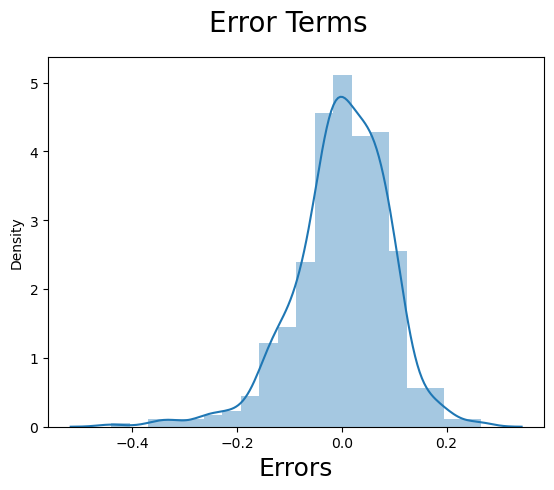

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Inference the errors
The error is normally distributed 

###  Step 8. Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, 
it's time to go ahead and make predictions using the final, i.e. on eleventh model.

#### Applying the scaling on the test sets

In [71]:
bike_df1_test[num_cols] = scaler.transform(bike_df1_test[num_cols])
bike_df1_test.describe()
print(bike_df1_test.shape)


(219, 29)


#### Dividing into X_test and y_test

In [72]:
y_test = bike_df1_test.pop('cnt')
X_test = bike_df1_test

In [73]:
X_test.head()

,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_Mist_Cloudy,weathersit_LightSnow_Rain,holiday_yes_holiday,weekday_wed,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
184,0.831783,0.657364,0.084219,0,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
639,0.662528,0.898240,0.133655,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0.511964,0.837699,0.334206,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0.881625,0.437098,0.339570,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
X.shape

(510, 13)

In [75]:
print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [76]:
#Selecting the variables that were part of final model (Model 8).
X_train_lm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_LightSnow_Rain', 'weekday_mon',
       'workingday_yes_workingday', 'yr_2019', 'mnth_aug', 'mnth_sep',
       'mnth_oct'],
      dtype='object')

In [77]:
cols_test = ['temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_LightSnow_Rain', 'weekday_mon',
       'workingday_yes_workingday', 'yr_2019', 'mnth_aug', 'mnth_sep',
       'mnth_oct']

In [78]:
X_test_lm11 = X_test[cols_test]

In [79]:
# Adding constant variable to test dataframe
X_test_lm11 = sm.add_constant(X_test_lm11)

In [80]:
X_test_lm11.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_LightSnow_Rain', 'weekday_mon',
       'workingday_yes_workingday', 'yr_2019', 'mnth_aug', 'mnth_sep',
       'mnth_oct'],
      dtype='object')

In [81]:
X_test_lm11.shape

(219, 14)

In [82]:
# Making predictions using the Eleventh model
y_pred_lm11 = lr_11.predict(X_test_lm11)
# y_pred_lm11

In [83]:
y_pred_lm11.shape

(219,)

In [84]:
y_test.shape

(219,)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

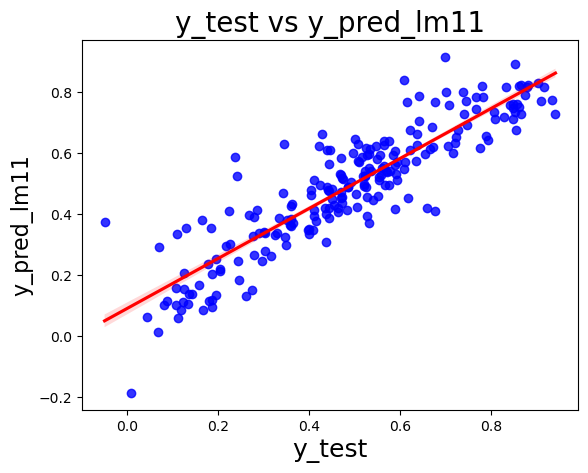

In [85]:
plt.figure()
sns.regplot(x=y_test, y=y_pred_lm11, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred_lm11', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred_lm11', fontsize=16)
plt.show()

### Conclusion: 
From the Model 11 model summary, it is evident that all our coefficients are not equal to zero. which means We can REJECT the NULL HYPOTHESIS
meaning H0 = 0
F Statistics : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 228
Prob (F-statistic): 1.31e-199
The F-Statistics value of 228 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## Step 10 : Calculating the r2 and inference on the final Model

#### The equation for best fitted line based on Model 11:
    
Linear Regression Equation = (Count*0.1509)+(temp∗0.5640)−(hum*.1998)- (windspeed∗0.1722)+(Seasonsummer∗0.1143)+(Seasonwinter∗0.1410)-(Weathersit_Mist_Cloudy∗0.0632)-(Weathersit_Light_Snow*0.2305)+(Weakday_mon∗0.0593)+
(workingday_yes_workingday*.0519)+(Year2019∗0.2377)+(mon_aug*.0619)+(mon_sep*.1330)+(mon_oct*.0530)

In [86]:
# CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA 
from sklearn.metrics import mean_squared_error,r2_score

y_train_pred = lr_11.predict(X_train_lm)

mse = np.sqrt(mean_squared_error(y_test, y_pred_lm11))
rsquared_test = r2_score(y_test, y_pred_lm11)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round((rsquared_train*100),2))
print('R-squared for test data:',round((rsquared_test*100),2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 85.67
R-squared for test data: 79.76
Mean Squared Error 0.1


### Conclusion
As per our final Model, the below predictor variables influences bike booking :

Positive influence

1. temp
2. Seasonsummer
3. Seasonwinter
4. Weakday_mon
5. workingday_yes_workingday
6. Year2019
7. mon_aug
8. mon_sep
9. mon_oct


Negative Influence
1. windspeed
2. hum
3. Weathersit_Mist_Cloudy
4. Weathersit_Light_Snow